**K-Means Uygulama**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
df

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [11]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [12]:
# Duplike (Aynı satırdan birden fazla varsa fazla olamları siliyor) data kontrolü 
df.drop_duplicates(inplace=True)

In [13]:
# input olarak sadece Spending_Score ve Annual_Income_(k$) kullanalım
# kolay görselleştirme için

X=df.iloc[:,[2,3]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [19]:
#Şimdi elbow method ile optimum K değerini bulalım:
from sklearn.cluster import KMeans
wcss=[]

#init='k-means++' parametresi, küme merkezlerinin başlangıç konumlarını belirlemek için daha etkili bir yöntem olan k-means++'ı kullanır.

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia_ bu model için wcss değerini döner
    wcss.append(kmeans.inertia_)
#init='k-means++' parametresi, küme merkezlerinin başlangıç konumlarını belirlemek için daha etkili bir yöntem olan k-means++'ı kullanır.

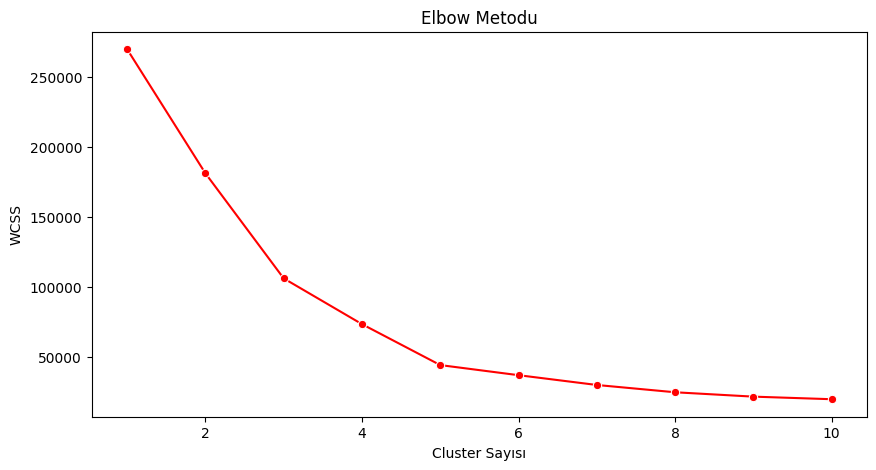

In [24]:
# şimdi wcss değerlerini görelim

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')

plt.title('Elbow Metodu')

plt.xlabel('Cluster Sayısı')
plt.ylabel('WCSS')

plt.show()

Açıkça görüldüğü gibi en ciddi kırılma (dirsek) K = 5 noktasında olmuş.

Dolayısı ile en uygun K değeri 5'tir diyebiliriz bu data set için.

In [25]:
K=5

In [26]:
# K-Means

kmeans = KMeans(n_clusters = K, init = 'k-means++', random_state = 42)

# fit ve predict 
y_kmeans = kmeans.fit_predict(X)

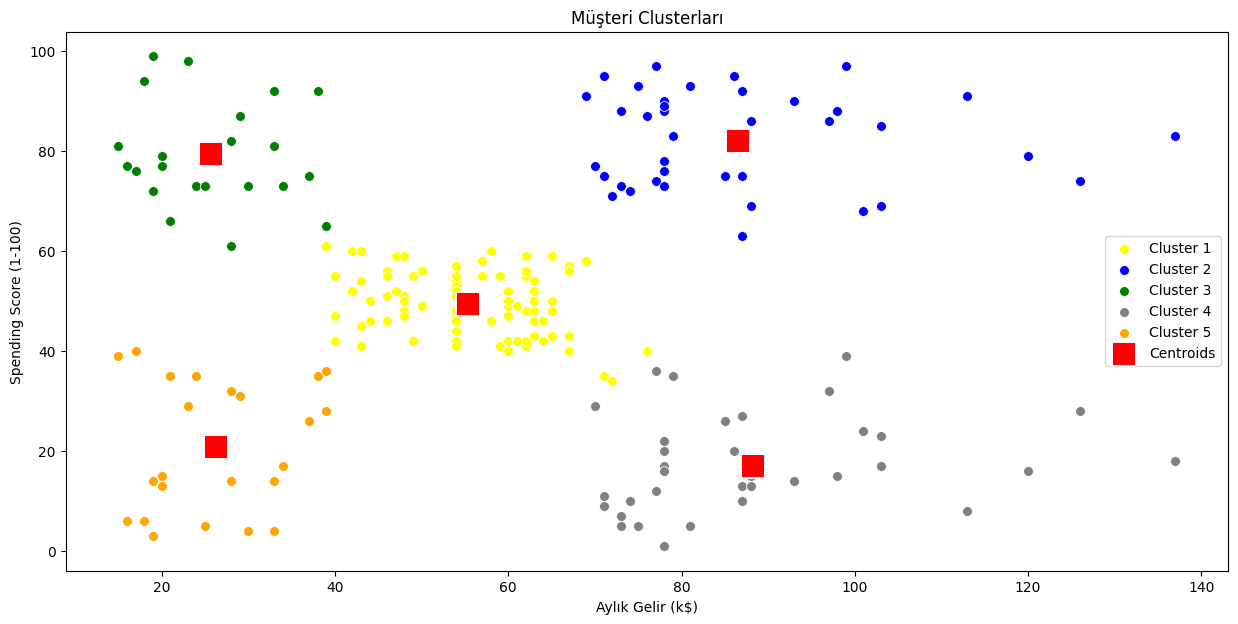

In [29]:
plt.figure(figsize=(15,7))

# K = 5 için
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], 
                y=kmeans.cluster_centers_[:, 1], 
                color = 'red', 
                label = 'Centroids',
                s=300,
                marker=',')

plt.grid(False)

plt.title('Müşteri Clusterları')

plt.xlabel('Aylık Gelir (k$)')
plt.ylabel('Spending Score (1-100)')

plt.legend()
plt.show()